In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import requests

Download Files From URLs

In [2]:
from bs4 import BeautifulSoup

In [3]:
file_url = 'https://pds-geosciences.wustl.edu/insight/urn-nasa-pds-insight_seis/data/xb/continuous_waveform/elyh0/2018/'

In [4]:
folders = [334]     #  [334] [334, 335, 336]

In [5]:
base_url = 'https://pds-geosciences.wustl.edu'
files_csv = []
for f in folders:
    print(file_url+str(f)+'/')
    url = file_url+str(f)+'/'
    response = requests.get(url)
    page_content = response.text
    #print(page_content)
    soup = BeautifulSoup(page_content, 'html.parser')
    # Find all links
    links = soup.find_all('a')
    # Filter and print the file links
    for link in links:
        href = link.get('href')
        if re.search('.csv', href):
            files_csv.append(base_url+href)

https://pds-geosciences.wustl.edu/insight/urn-nasa-pds-insight_seis/data/xb/continuous_waveform/elyh0/2018/334/


In [6]:
import re
def get_metadata_from_url(url, n_lines):
    metadata = {}
    response = requests.get(url)
    if response.status_code == 200:
        lines = response.text.splitlines()
        for i in range(min(n_lines, len(lines))):
            tokens = lines[i].split(':')
            metadata[re.sub('[# ]', '', tokens[0])] = tokens[1].replace(' ', '')
    else:
        print(f"Error: Could not download file from {url}")
    return metadata

In [7]:
metadata = get_metadata_from_url(files_csv[0], 16)
metadata

{'dataset': 'GeoCSV2.0',
 'delimiter': ',',
 'SID': 'XB_ELYH0_02_VMA',
 'sample_count': '75',
 'sample_rate_hz': '0.25',
 'start_time': '2018-11-30T19',
 'latitude_deg': '4.502384',
 'longitude_deg': '135.623447',
 'elevation_m': '-2613.4',
 'depth_m': '0.9',
 'azimuth_deg': '90.0',
 'dip_deg': '0',
 'instrument': 'HK-Position',
 'geodetic_datum': 'Mars2000planetocentric,MOLAgeoid',
 'field_unit': 'UTC,Counts',
 'field_type': 'datetime,INTEGER'}

In [31]:
instruments = []
for f in files_csv:
    metadata = get_metadata_from_url(f, 16)
    tmp = [metadata['instrument'], metadata['sample_rate_hz']]
    if tmp not in instruments:
        instruments.append(tmp)
print(instruments)

[['HK-Position', '0.25'], ['HK-Voltage', '0.25'], ['HK-TEMP', '0.25'], ['HK-Current', '0.25']]


In [62]:
import json
filename = 'C:/apps/NASA_Challenge/2024/data/metadata.txt'
metadata_list = []
for file in files_csv:
    metadata_list.append(get_metadata_from_url(file, 16))
## Save metadata list to file
with open(filename, "w") as f:
    for d in metadata_list:
        json_str = json.dumps(d)
        f.write(json_str + "\n")

In [16]:
data = pd.DataFrame()
for f in files_csv:
    metadata = get_metadata_from_url(f, 16)
    if metadata['instrument'] == 'HK-Position':
        temp_df = pd.read_csv(f, skiprows=16)
        data = pd.concat([data, temp_df], ignore_index=True)
data.head(10)

,Time,Sample
0,2018-11-30T19:05:46.039000Z,38023
1,2018-11-30T19:05:50.039000Z,38021
2,2018-11-30T19:05:54.039000Z,38022
3,2018-11-30T19:05:58.039000Z,38020
4,2018-11-30T19:06:02.039000Z,38024
5,2018-11-30T19:06:06.039000Z,38020
6,2018-11-30T19:06:10.039000Z,38023
7,2018-11-30T19:06:14.039000Z,38019
8,2018-11-30T19:06:18.039000Z,38023
9,2018-11-30T19:06:22.039000Z,38020


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Time     450 non-null    object
 1    Sample  450 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 7.2+ KB


In [18]:
data.describe()

,Sample
count,450.000000
mean,38017.488889
std,2.016880
min,38016.000000
25%,38016.000000
50%,38016.000000
75%,38018.000000
max,38025.000000


In [19]:
# Convert the column to datetime
data['date_tm'] = pd.to_datetime(data['Time'])

In [20]:
# Extract time from the datetime column
data['time_data'] = data['date_tm'].dt.time

In [21]:
data

,Time,Sample,date_tm,time_data
0,2018-11-30T19:05:46.039000Z,38023,2018-11-30 19:05:46.039000+00:00,19:05:46.039000
1,2018-11-30T19:05:50.039000Z,38021,2018-11-30 19:05:50.039000+00:00,19:05:50.039000
2,2018-11-30T19:05:54.039000Z,38022,2018-11-30 19:05:54.039000+00:00,19:05:54.039000
3,2018-11-30T19:05:58.039000Z,38020,2018-11-30 19:05:58.039000+00:00,19:05:58.039000
4,2018-11-30T19:06:02.039000Z,38024,2018-11-30 19:06:02.039000+00:00,19:06:02.039000
...,...,...,...,...
445,2018-11-30T19:10:26.039000Z,38016,2018-11-30 19:10:26.039000+00:00,19:10:26.039000
446,2018-11-30T19:10:30.039000Z,38016,2018-11-30 19:10:30.039000+00:00,19:10:30.039000
447,2018-11-30T19:10:34.039000Z,38016,2018-11-30 19:10:34.039000+00:00,19:10:34.039000
448,2018-11-30T19:10:38.039000Z,38016,2018-11-30 19:10:38.039000+00:00,19:10:38.039000


In [22]:
color_pal = sns.color_palette()

In [23]:
color_pal

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

---
Filter data

In [24]:
data = data.set_index('date_tm')

In [25]:
data.columns

Index(['Time', ' Sample', 'time_data'], dtype='object')

<AxesSubplot: title={'center': 'Samples'}, xlabel='date_tm'>

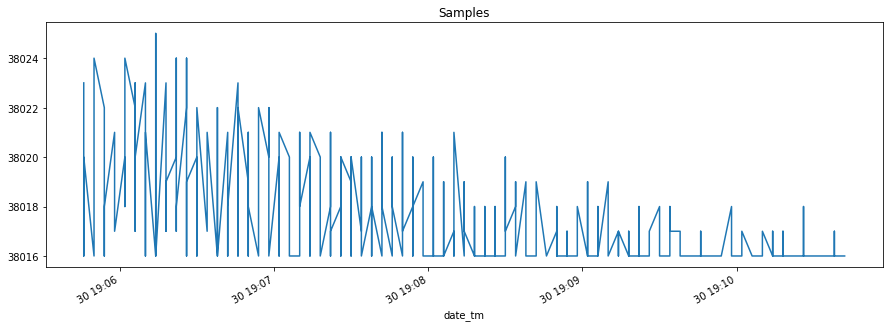

In [26]:
data[' Sample'].plot.line(figsize=(15, 5), color=color_pal[0], title='Samples')

<AxesSubplot: title={'center': 'Prague_3 Orders'}, xlabel='date'>

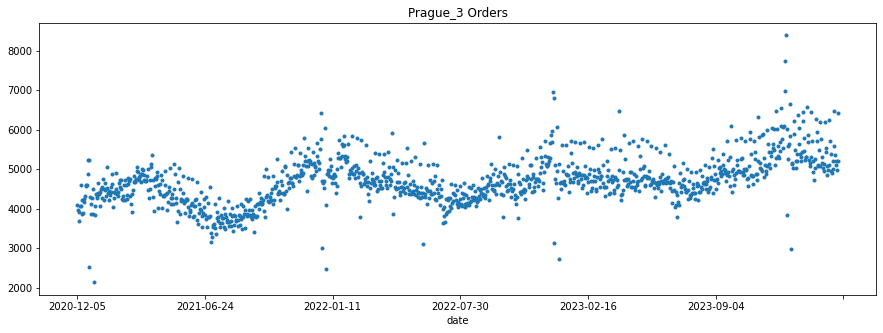

In [17]:
data[data['warehouse'] == 'Prague_3'].orders.plot(style='.', figsize=(15, 5), color=color_pal[0], title='Prague_3 Orders')

<AxesSubplot: title={'center': 'Brno_1 Orders'}, xlabel='date'>

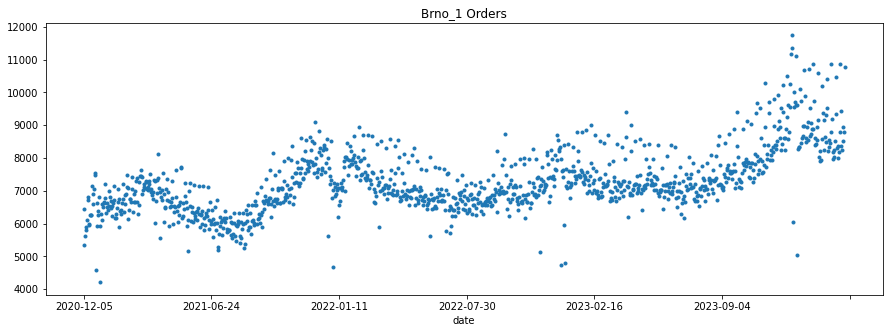

In [18]:
data[data['warehouse'] == 'Brno_1'].orders.plot(style='.', figsize=(15, 5), color=color_pal[0], title='Brno_1 Orders')

<AxesSubplot: title={'center': 'Munich_1 Orders'}, xlabel='date'>

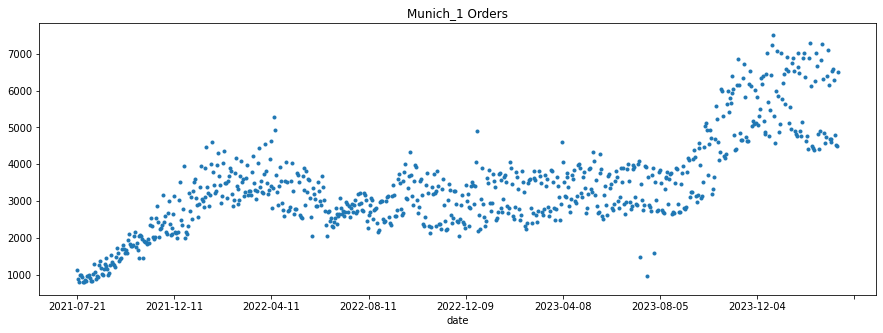

In [19]:
data[data['warehouse'] == 'Munich_1'].orders.plot(style='.', figsize=(15, 5), color=color_pal[0], title='Munich_1 Orders')

<AxesSubplot: title={'center': 'Frankfurt_1 Orders'}, xlabel='date'>

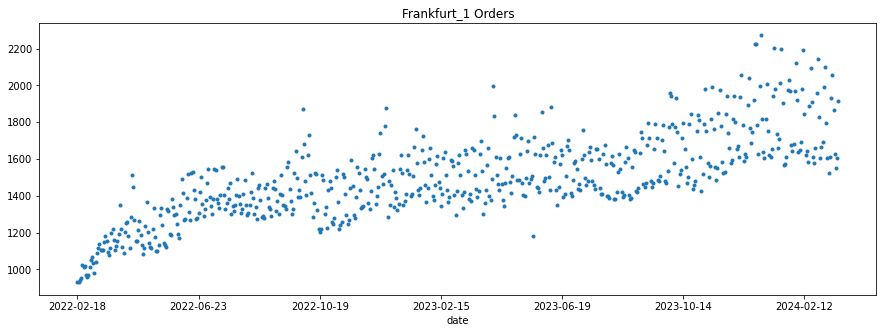

In [20]:
data[data['warehouse'] == 'Frankfurt_1'].orders.plot(style='.', figsize=(15, 5), color=color_pal[0], title='Frankfurt_1 Orders')

<AxesSubplot: title={'center': 'Budapest_1 Orders'}, xlabel='date'>

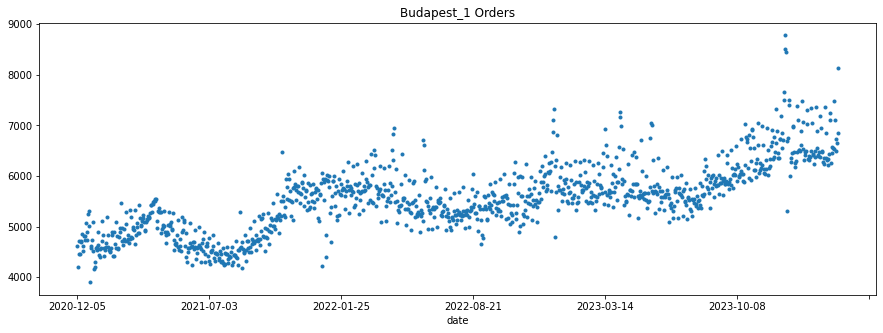

In [21]:
data[data['warehouse'] == 'Budapest_1'].orders.plot(style='.', figsize=(15, 5), color=color_pal[0], title='Budapest_1 Orders')

In [15]:
data.columns

Index(['warehouse', 'orders', 'holiday_name', 'holiday', 'shutdown',
       'mini_shutdown', 'shops_closed', 'winter_school_holidays',
       'school_holidays', 'blackout', 'mov_change', 'frankfurt_shutdown',
       'precipitation', 'snow', 'user_activity_1', 'user_activity_2', 'id',
       'date_tm'],
      dtype='object')

Change index from date column of type object to date_tm of type date_time

In [16]:
data.index = data['date_tm']

<AxesSubplot: title={'center': 'Budapest_1 Orders'}, xlabel='date_tm'>

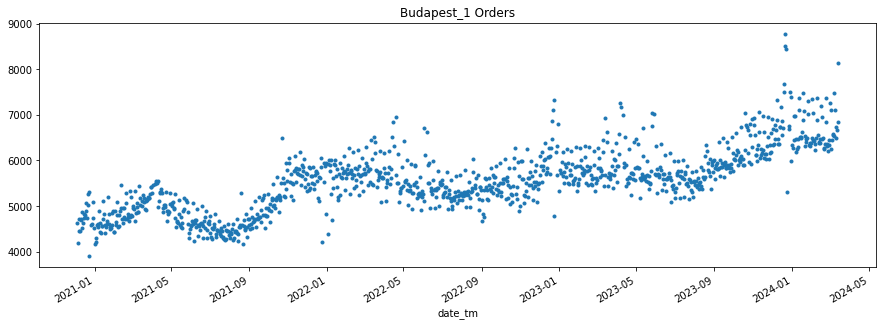

In [17]:
data[data['warehouse'] == 'Budapest_1'].orders.plot(style='.', figsize=(15, 5), color=color_pal[0], title='Budapest_1 Orders')

---
Train model to predict last 6 months of 2024

In [18]:
train = data.loc[data.index < '01-01-2024']
test = data.loc[data.index >= '01-01-2024']

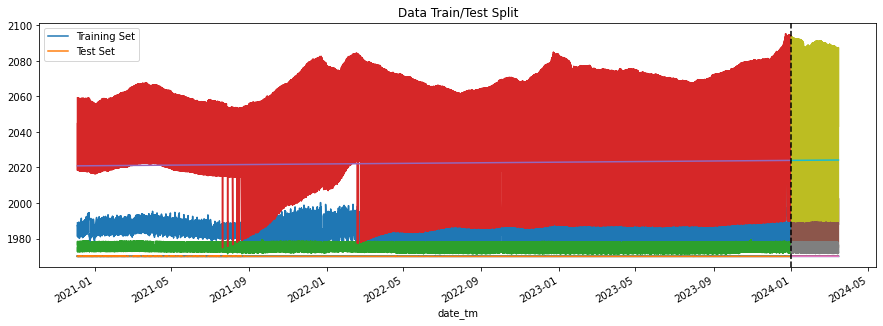

In [22]:
fig, ax = plt.subplots(figsize=(15, 5))
train.plot(ax=ax, label='Training Set', title='Data Train/Test Split')
test.plot(ax=ax, label='Test Set')
ax.axvline('01-01-2024', color='black', ls='--')
ax.legend(['Training Set', 'Test Set'])
plt.show()

In [23]:
data.index.max()

Timestamp('2024-03-15 00:00:00')

C:\Users\MARIADELOSANGELES\AppData\Local\Temp\ipykernel_10220\2876094665.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data.loc[(data.index > '01-01-2024') & (data.index < '16-03-2024')].orders.plot()


<AxesSubplot: xlabel='date_tm'>

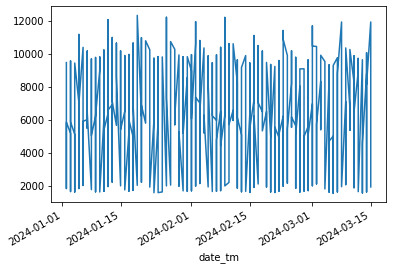

In [25]:
data.loc[(data.index > '01-01-2024') & (data.index < '16-03-2024')].orders.plot()

Feature creation

In [ ]:
def create_features(data):
    ##
    # Create time series features based on time series index of type date_time
    ##
    data['dayofweek'] = data.index.dayofweek
    data['quarter'] = data.index.quarter
    data['year'] = data.index.year
    data['dayofyear'] = data.index.dayofyear
    return data

---
Label Encoded

In [12]:
from sklearn.preprocessing import LabelBinarizer, LabelEncoder

In [13]:
lb, le = LabelBinarizer(), LabelEncoder()

In [14]:
binary_variables = ['Gender', 'Vehicle_Damage']

In [15]:
categorical_variables = ['Vehicle_Age']

In [16]:
for column in binary_variables:
    data[column] = lb.fit_transform(data[column])

https://www.kdnuggets.com/2023/07/pandas-onehot-encode-data.html

https://www.programiz.com/python-programming/pandas/get-dummies#:~:text=Use%20of%20drop_first%20Inside%20get_dummies()&text=Here%2C%20the%20drop_first%3DTrue%20argument,columns%20because%20it%20was%20dropped.

https://www.maximaformacion.es/blog-ciencia-datos/que-es-la-multicolinealidad-y-por-que-es-un-problema/

In [17]:
df_encoded = pd.get_dummies(data, columns = categorical_variables)

In [18]:
df_encoded.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response', 'Vehicle_Age_1-2 Year',
       'Vehicle_Age_< 1 Year', 'Vehicle_Age_> 2 Years'],
      dtype='object')

In [19]:
data.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [20]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11504798 entries, 0 to 11504797
Data columns (total 14 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   id                     int64  
 1   Gender                 int32  
 2   Age                    int64  
 3   Driving_License        int64  
 4   Region_Code            float64
 5   Previously_Insured     int64  
 6   Vehicle_Damage         int32  
 7   Annual_Premium         float64
 8   Policy_Sales_Channel   float64
 9   Vintage                int64  
 10  Response               int64  
 11  Vehicle_Age_1-2 Year   uint8  
 12  Vehicle_Age_< 1 Year   uint8  
 13  Vehicle_Age_> 2 Years  uint8  
dtypes: float64(3), int32(2), int64(6), uint8(3)
memory usage: 910.7 MB


In [21]:
features = data.columns.to_list()
print(features)
print('Features num. = ', len(features))

['id', 'Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage', 'Response']
Features num. =  12


In [22]:
features.remove('id')

In [23]:
import seaborn as sns

---
Heat Map

C:\Users\MARIADELOSANGELES\AppData\Local\Temp\ipykernel_9348\3679768278.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor_matrix = data[features].corr()


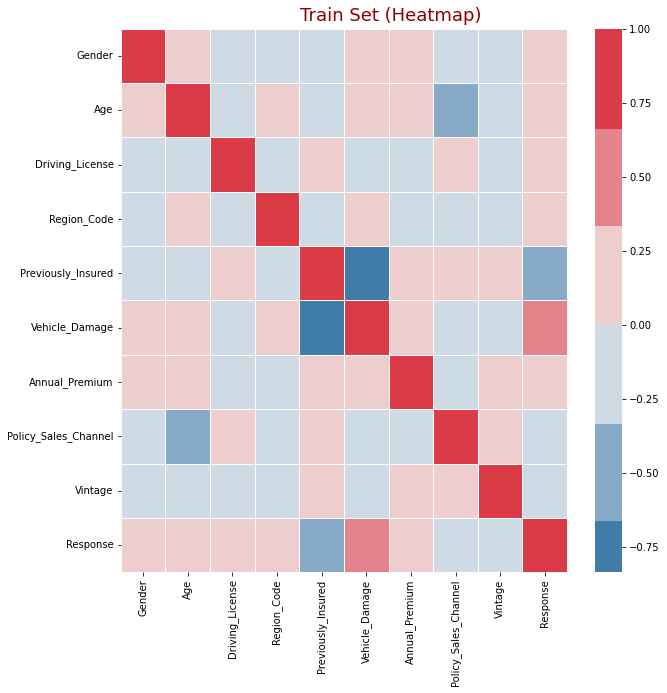

In [24]:
cor_matrix = data[features].corr()
fig = plt.figure(figsize=(10,10));

cmap=sns.diverging_palette(240, 10, s=75, l=50, sep=1, n=6, center='light', as_cmap=False);
sns.heatmap(cor_matrix, center=0, annot=False, cmap=cmap, linewidths=1);
plt.suptitle('Train Set (Heatmap)', y=0.91, fontsize=18, c='darkred');
plt.show()

In [ ]:
corr = data[features].corr(numeric_only=True).round(3)
#corr.style.background_gradient(axis=0, cmap='YlOrRd')
corr.style.background_gradient(cmap='YlOrRd')

---
Subsampling

In [24]:
df_encoded.shape

(11504798, 14)

In [25]:
df_encoded['Response'].value_counts(normalize=True)

0    0.877003
1    0.122997
Name: Response, dtype: float64

In [26]:
data_sampled = df_encoded.sample(frac=0.20)   # 40% is to long

In [27]:
data_sampled.shape

(2300960, 14)

In [28]:
data_sampled['Response'].value_counts(normalize=True)

0    0.877358
1    0.122642
Name: Response, dtype: float64

In [29]:
features = data_sampled.columns.to_list()

In [30]:
features.remove('id')
features.remove('Response')

In [31]:
X = data_sampled[features]
y = data_sampled['Response']

---
Split the data
Select only one of [train_test_split, StratifiedShuffleSplit]

In [32]:
from sklearn.model_selection import train_test_split
# Split the data to Train, and Test (70%, 30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

Check distribution

In [33]:
df_encoded['Response'].value_counts(normalize=True)

0    0.877003
1    0.122997
Name: Response, dtype: float64

In [34]:
y_train.value_counts(normalize=True)

0    0.877256
1    0.122744
Name: Response, dtype: float64

In [35]:
X_train.columns

Index(['Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Vehicle_Damage', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage',
       'Vehicle_Age_1-2 Year', 'Vehicle_Age_< 1 Year',
       'Vehicle_Age_> 2 Years'],
      dtype='object')

---
Run all machine learning models at once, with Lazypredict Classifier

In [37]:
from lazypredict.Supervised import LazyClassifier

In [ ]:
from sklearn.utils import all_estimators
from sklearn.base import ClassifierMixin

In [ ]:
removed_classifiers = [
"ClassifierChain",
"ComplementNB",
"GradientBoostingClassifier",
"GaussianProcessClassifier",
"HistGradientBoostingClassifier",
"MLPClassifier",
"LogisticRegressionCV",
"MultiOutputClassifier",
"MultinomialNB",
"OneVsOneClassifier",
"OneVsRestClassifier",
"OutputCodeClassifier",
"RadiusNeighborsClassifier",
"VotingClassifier",
'SVC','LabelPropagation','LabelSpreading','NuSV']
classifiers_list = [est for est in all_estimators() if (issubclass(est[1], ClassifierMixin) and (est[0] not in removed_classifiers))]
classifiers_list

In [38]:
import sklearn 

In [39]:
classifiers = [('AdaBoostClassifier', sklearn.ensemble._weight_boosting.AdaBoostClassifier),
 ('BaggingClassifier', sklearn.ensemble._bagging.BaggingClassifier),
 ('BernoulliNB', sklearn.naive_bayes.BernoulliNB),
 ('DecisionTreeClassifier', sklearn.tree._classes.DecisionTreeClassifier),
 ('GaussianNB', sklearn.naive_bayes.GaussianNB),
 ('KNeighborsClassifier', sklearn.neighbors._classification.KNeighborsClassifier),
 ('LinearDiscriminantAnalysis', sklearn.discriminant_analysis.LinearDiscriminantAnalysis),
 ('LinearSVC', sklearn.svm._classes.LinearSVC),
 ('LogisticRegression', sklearn.linear_model._logistic.LogisticRegression),
 ('Perceptron', sklearn.linear_model._perceptron.Perceptron),
 ('RandomForestClassifier', sklearn.ensemble._forest.RandomForestClassifier),
 ('RidgeClassifier', sklearn.linear_model._ridge.RidgeClassifier),
 ('RidgeClassifierCV', sklearn.linear_model._ridge.RidgeClassifierCV),
 ('SGDClassifier', sklearn.linear_model._stochastic_gradient.SGDClassifier),
 ('StackingClassifier', sklearn.ensemble._stacking.StackingClassifier)]

In [40]:
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None, classifiers=classifiers)

In [41]:
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
models

'tuple' object has no attribute '__name__'
Invalid Classifier(s)


100%|██████████| 15/15 [1:14:53<00:00, 299.60s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
GaussianNB,0.72,0.78,0.78,0.77,4.06
BernoulliNB,0.74,0.73,0.73,0.78,4.05
DecisionTreeClassifier,0.83,0.62,0.62,0.83,30.06
KNeighborsClassifier,0.86,0.57,0.57,0.84,2289.16
BaggingClassifier,0.86,0.57,0.57,0.84,270.56
RandomForestClassifier,0.87,0.57,0.57,0.84,1004.71
Perceptron,0.86,0.52,0.52,0.82,5.97
LinearDiscriminantAnalysis,0.88,0.50,0.50,0.82,8.77
AdaBoostClassifier,0.88,0.50,0.50,0.82,201.86


---
Run best model propse for Lazypredict

In [36]:
from sklearn.tree import DecisionTreeClassifier

In [37]:
# Fitting Decisipn Tree Classification to the Training set
model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

---
Hyperparameters optimzation with GridSearch

In [38]:
from sklearn.model_selection import RandomizedSearchCV

In [45]:
# Number of trees in desicion Tree
criterion = ['gini', 'entropy', 'log_loss']
splitter = ['best', 'random']
max_depth = [int(x) for x in np.linspace(3, 10, num = 8)]
max_depth.append(None)
min_samples_split = [2, 3, 4]
min_samples_leaf = [1, 2]
min_weight_fraction_leaf = [round(np.float64(x), 2) for x in np.arange(0.00, 0.21, 0.01)]
max_features = ['sqrt', 'log2', None]


In [46]:
# Create the random grid
random_grid = {'criterion': criterion,
               'splitter': splitter,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'min_weight_fraction_leaf': min_weight_fraction_leaf,
               'max_features': max_features
               }
random_grid

{'criterion': ['gini', 'entropy', 'log_loss'],
 'splitter': ['best', 'random'],
 'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, None],
 'min_samples_split': [2, 3, 4],
 'min_samples_leaf': [1, 2],
 'min_weight_fraction_leaf': [0.0,
  0.01,
  0.02,
  0.03,
  0.04,
  0.05,
  0.06,
  0.07,
  0.08,
  0.09,
  0.1,
  0.11,
  0.12,
  0.13,
  0.14,
  0.15,
  0.16,
  0.17,
  0.18,
  0.19,
  0.2],
 'max_features': ['sqrt', 'log2', None]}

In [47]:
# Use the random grid to search for best hyperparameters
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rscv_random = RandomizedSearchCV(estimator = model_dt, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rscv_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [3, 4, 5, 6, 7, 8, 9, 10,
                                                      None],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 3, 4],
                                        'min_weight_fraction_leaf': [0.0, 0.01,
                                                                     0.02, 0.03,
                                                                     0.04, 0.05,
                                                                     0.06, 0.07,
                                                                     0.08, 0.09,
                                                                     0.1, 0.11,
                                                                     0.12, 0.13,
                                                                     0.14, 0.15,
                                                                     0.16, 0.17,
                                                                     0.18, 0.19,
                                                                     0.2],
                                        'splitter': ['best', 'random']},
                   random_state=42, verbose=2)

In [48]:
rscv_random.best_params_

{'splitter': 'random',
 'min_weight_fraction_leaf': 0.01,
 'min_samples_split': 3,
 'min_samples_leaf': 2,
 'max_features': None,
 'max_depth': 5,
 'criterion': 'log_loss'}

In [49]:
model_dt = DecisionTreeClassifier(splitter='random', min_weight_fraction_leaf=0.01, min_samples_split=3, min_samples_leaf=2, max_features=None, max_depth=5, random_state=42)
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=2, min_samples_split=3,
                       min_weight_fraction_leaf=0.01, random_state=42,
                       splitter='random')

In [50]:
y_pred = model_dt.predict(X_test)

In [51]:
y_hat = pd.DataFrame(y_pred, columns=['Response']) 

In [52]:
y_hat

,Response
0,0
1,0
2,0
3,0
4,0
...,...
690283,0
690284,0
690285,0
690286,0


---
Check accuracy

In [53]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score

In [54]:
# Preciision, recall, f-score from the multi-class support function
print(classification_report(y_test, y_pred))
print('Accuracy score: ', round(accuracy_score(y_test, y_pred), 2))
#print('F1 Score: ', round(f1_score(y_test, y_pred), 2))

c:\apps\python\vs-virtual-env\env\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\apps\python\vs-virtual-env\env\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.88      1.00      0.93    605795
           1       0.00      0.00      0.00     84493

    accuracy                           0.88    690288
   macro avg       0.44      0.50      0.47    690288
weighted avg       0.77      0.88      0.82    690288

Accuracy score:  0.88


c:\apps\python\vs-virtual-env\env\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


---
Run model with test data

In [ ]:
file_path = 'C:/apps/kaggle/playground_series_s4e7/data/test.csv'

In [ ]:
df_test = pd.read_csv(file_path)
df_test.head(5)

In [ ]:
binary_variables

In [ ]:
for column in binary_variables:
    df_test[column] = lb.fit_transform(df_test[column])

In [ ]:
categorical_variables

In [ ]:
df_one_encoded = pd.get_dummies(df_test, columns = categorical_variables, drop_first = False)

In [ ]:
df_one_encoded.columns

In [ ]:
X_train.columns

In [ ]:
df_test = df_one_encoded.drop('id', axis=1)

In [ ]:
df_test.columns

In [ ]:
final_pred = model_gnb.predict(df_test)

In [ ]:
final_pred

In [ ]:
y_sub = pd.DataFrame(final_pred, columns=['Response'])

In [ ]:
df_one_encoded.columns

In [ ]:
df_one_encoded['id']

In [ ]:
y_sub

In [ ]:
final_df = df_one_encoded[['id']].copy()

In [ ]:
y_sub['Response']

In [ ]:
final_df['Response'] = y_sub['Response']

In [ ]:
final_df

In [ ]:
final_df.to_csv('C:/apps/kaggle/playground_series_s4e7/data/submission6.csv', index=False)

---